/tmp/ipython-input-1-131579032.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


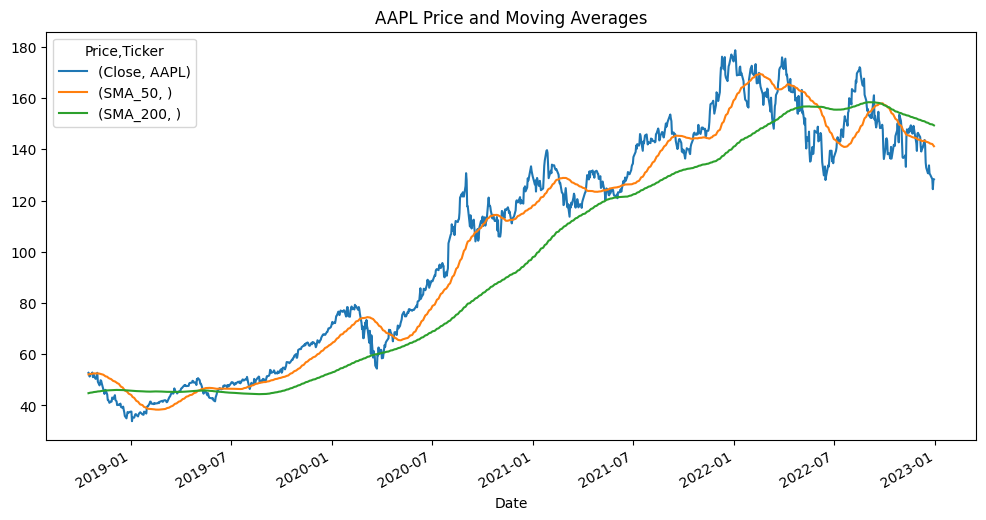

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download 5 years of daily data for AAPL
df = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Calculate 50-day and 200-day simple moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Drop rows with NaNs (first 200 days or so)
df.dropna(inplace=True)

df[['Close', 'SMA_50', 'SMA_200']].plot(figsize=(12,6))
plt.title('AAPL Price and Moving Averages')
plt.show()

GENERTAING TRADE SIGNAL

In [3]:
# Create a signal column
df['Signal'] = 0

# Signal is 1 (buy) when SMA_50 crosses above SMA_200
df['Signal'][df['SMA_50'] > df['SMA_200']] = 1
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1

# Signal is 0 (sell/hold cash) otherwise
df['Position'] = df['Signal'].shift(1)  # Shift to simulate buying on next day's open


/tmp/ipython-input-3-2185832788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['SMA_50'] > df['SMA_200']] = 1
/tmp/ipython-input-3-2185832788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['SMA_50'] > df['SMA_200']] = 1


In [4]:
df['Returns'] = df['Close'].pct_change()

df['Strategy_Returns'] = df['Position'] * df['Returns']

df['Cumulative_Market'] = (1 + df['Returns']).cumprod()
df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()

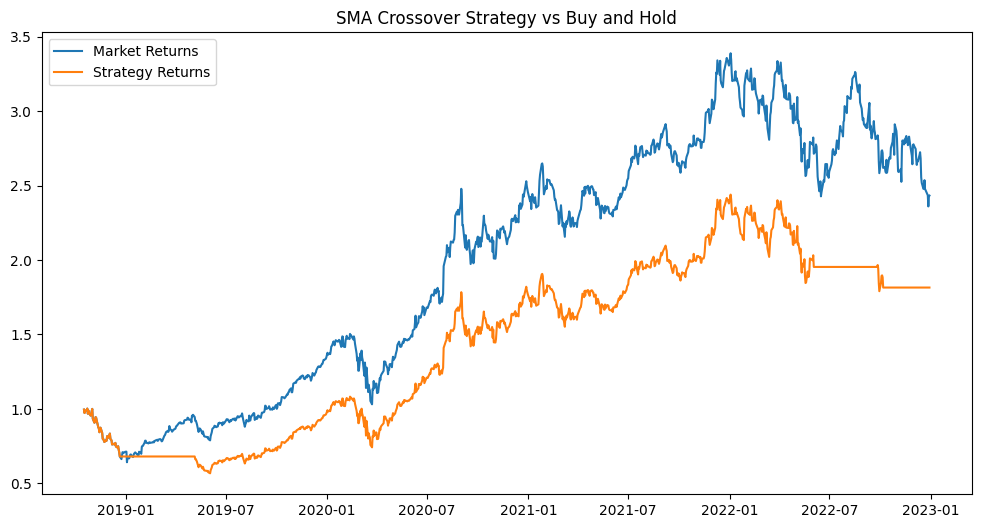

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Cumulative_Market'], label='Market Returns')
plt.plot(df['Cumulative_Strategy'], label='Strategy Returns')
plt.title('SMA Crossover Strategy vs Buy and Hold')
plt.legend()
plt.show()